In [1]:
# data management
import pandas as pd 
import geopandas as gpd 
# plotting
import matplotlib.pyplot as plt 

# request packages
import requests
from api_keys import *

# define request header
headers = {"user_agent": user_agent_ons}
 

/Users/Tra_FIT/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(
<ipython-input-1-3165613b831d>:3: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS dir

## Retrieve Shapfile

In [47]:
# getting the shapefile
utla = "https://services1.arcgis.com/ESMARspQHYMw9BZ9/arcgis/rest/services/Upper_Tier_Local_Authorities_December_2022_Boundaries_UK_BFC/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson"
utla_gdf = gpd.read_file(utla)
# filer for england only
utla_gdf = utla_gdf[utla_gdf['UTLA22CD'].str.contains("E")]
# inspect the frame
utla_gdf.head()

,FID,UTLA22CD,UTLA22NM,UTLA22NMW,BNG_E,BNG_N,LONG,LAT,Shape__Area,Shape__Length,GlobalID,geometry
0,1,E06000001,Hartlepool,,447160,531474,-1.27018,54.67614,9.371703e+07,70995.173776,4b2f43f2-3cb7-46e3-9b77-6f6866ead5a0,"MULTIPOLYGON (((-1.22470 54.62611, -1.22493 54..."
1,2,E06000002,Middlesbrough,,451141,516887,-1.21099,54.54467,5.388156e+07,44479.646370,89c5d0f4-29f8-488c-af15-8e5fa32b2056,"MULTIPOLYGON (((-1.27720 54.54784, -1.27721 54..."
2,3,E06000003,Redcar and Cleveland,,464361,519597,-1.00608,54.56752,2.450695e+08,96703.510654,78f85679-380c-48ce-948b-24830919ba37,"MULTIPOLYGON (((-1.20098 54.57763, -1.20030 54..."
3,4,E06000004,Stockton-on-Tees,,444940,518183,-1.30664,54.55691,2.049329e+08,123404.959102,c6963483-92a7-415e-af7a-0d62c5484ba8,"MULTIPOLYGON (((-1.27211 54.55337, -1.27213 54..."
4,5,E06000005,Darlington,,428029,515648,-1.56835,54.53534,1.974778e+08,107202.299425,c9a712e6-97ea-44a3-b158-a19879221e3a,"POLYGON ((-1.63768 54.61714, -1.63767 54.61670..."


In [48]:
# getting the shapefile
ltla = "https://services1.arcgis.com/ESMARspQHYMw9BZ9/arcgis/rest/services/Local_Authority_Districts_December_2023_Boundaries_UK_BFC/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson"
ltla_gdf = gpd.read_file(ltla)
# filer for england only
ltla_gdf = ltla_gdf[ltla_gdf['LAD23CD'].str.contains("E")]
# inspect the frame
ltla_gdf.head()

,FID,LAD23CD,LAD23NM,LAD23NMW,BNG_E,BNG_N,LONG,LAT,Shape__Area,Shape__Length,GlobalID,geometry
0,1,E06000001,Hartlepool,,447160,531474,-1.27018,54.67614,9.371464e+07,70954.840119,ed77cf59-0f99-40ee-8ce0-3c495b0436dd,"MULTIPOLYGON (((-1.22470 54.62611, -1.22493 54..."
1,2,E06000002,Middlesbrough,,451141,516887,-1.21099,54.54467,5.388156e+07,44481.441385,12aebc50-49df-4d0f-af2e-7b18e5928ad7,"MULTIPOLYGON (((-1.27720 54.54784, -1.27721 54..."
2,3,E06000003,Redcar and Cleveland,,464361,519597,-1.00608,54.56752,2.450783e+08,96686.052777,b073197d-76d1-468b-a1ca-e71a9465fc1e,"MULTIPOLYGON (((-1.20098 54.57763, -1.20030 54..."
3,4,E06000004,Stockton-on-Tees,,444940,518179,-1.30664,54.55687,2.049432e+08,123599.429825,a722dfde-1ff3-4a0c-90e7-4b7cc413ba49,"MULTIPOLYGON (((-1.27211 54.55337, -1.27213 54..."
4,5,E06000005,Darlington,,428029,515648,-1.56835,54.53534,1.974895e+08,107285.227956,7341c0fb-23f7-4180-9f8f-f11c67107389,"POLYGON ((-1.63768 54.61714, -1.63767 54.61670..."


## Defining the Prameters
A standard API query to the NHS's fingertips API requires the following:
* Area
* indcator ID: https://fingertips.phe.org.uk/api/indicator_metadata/all
    * 90323
    * 2008

In [49]:
area_metadata = "https://fingertips.phe.org.uk/api/area_types/with_data/"
res =requests.get(area_metadata)
res.status_code

200

### 1.1 Area Code

In [6]:
pd.json_normalize(res.json())

,Id,Name,Short,Class,Sequence,CanBeDisplayedOnMap
0,118,Acute Trusts (incl.combined MH+Acute),Acute Trusts,None,0,False
1,41,Ambulance Trust,Ambulance Trust,None,0,False
2,154,CCGs (2018/19),CCGs (2018/19),ccg-composite,2018,True
3,165,CCGs (2019/20),CCGs (2019/20),ccg-composite,2019,True
4,166,CCGs (2020/21),CCGs (2020/21),ccg-composite,2020,True
5,167,CCGs (2021/22),CCGs (from Apr 2021),ccg-composite,2021,True
6,10,Parliamentary Constituency 2022-12-31,Constituencies,parl-constituency,0,False
7,202,Upper tier local authorities (4/19 - 3/20),Counties & UAs (2019/20),ua-county-composite,2019,True
8,302,Upper tier local authorities (4/20-3/21),Counties & UAs (2020/21),ua-county-composite,2020,True
9,402,Upper tier local authorities (4/21-3/23),Counties & UAs (2021/22-2022/23),ua-county-composite,2021,True


### 1.2 Indicator ID
From the API, we can retrieve all the indicator ids.
The result from this API, however, returns a dictionary of {key: indicator}.
To parse it into the pandas data frame, we will need to discard the key.

The result data frame also has a lot of irrelevant columns. We will only use the following:
* Indicator ID: IID
* Description: Descriptive.Name

Note that some other columns maybe usefule in the future:
* Datachange.LastUploadedAt



In [7]:
ind_id_metadata = "https://fingertips.phe.org.uk/api/indicator_metadata/all"
res = requests.get(ind_id_metadata, headers = headers)
# parse the data 
clean_res_json = [val for key,val in res.json().items()]
df = pd.json_normalize(clean_res_json)
df_cols = df.columns
# subset only the relevant columns
df = df[["IID",'Descriptive.Name', 'Descriptive.DataSource']]
# rename the columns
df.columns = ['IID',"desp", 'src']
# inspect the result
df.head()

,IID,desp,src
0,108,Under 75 mortality rate from all causes,Office for Health Improvement and Disparities ...
1,113,Smoking attributable mortality (old method),"ONS mortality file, ONS LSOA single year of ag..."
2,114,QOF Total List Size,"Quality and Outcomes Framework (QOF), NHS England"
3,200,Learning disability: QOF prevalence (all ages),"Quality and Outcomes Framework (QOF), NHS England"
4,212,Stroke: QOF prevalence (all ages),"Quality and Outcomes Framework (QOF), NHS England"


In [8]:
# define query 
weight_query = "(weigh?)|(obes)"
demo_query = "babies"
# apply the query
df['desp'] = df['desp'].str.lower()
df[(df['desp'].str.contains(weight_query)) 
    & ~(df['desp'].str.contains(demo_query)) 
   ]


<ipython-input-8-dec40880b4c9>:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[(df['desp'].str.contains(weight_query))


,IID,desp,src
59,2008,spend: obesity - adults,https://www.gov.uk/government/collections/loca...
60,2009,spend: obesity - children,https://www.gov.uk/government/collections/loca...
327,20601,reception prevalence of overweight (including ...,"OHID, using National Child Measurement Program..."
328,20602,year 6 prevalence of overweight (including obe...,"OHID, using National Child Measurement Program..."
387,90315,records with weight rounded to x.0 or x.5,"OHID, using National Child Measurement Program..."
388,90316,reception prevalence of underweight,"OHID, using National Child Measurement Program..."
389,90317,reception prevalence of healthy weight,"OHID, using National Child Measurement Program..."
390,90319,reception prevalence of obesity (including sev...,"OHID, using National Child Measurement Program..."
391,90320,year 6 prevalence of underweight,"OHID, using National Child Measurement Program..."
392,90321,year 6 prevalence of healthy weight,"OHID, using National Child Measurement Program..."


From this result, we can see that the following may be interesting for the purpose of the disseration
* 2008: Spend: obesity - adults
* 2009: Spend: obsesity -children
* 20602: Year 6 prevalence of overweight (including obesity)
* 90323: Year 6 prevalence of obesity (including severe obesity)
* 92588: Obesity: QOF prevalence (18+ yrs) (quality and outcome framework)
* (TBC)

### Load Indicator Data

In [2]:
iid = "90323"
iid_90323 = pd.read_csv(f"https://fingertips.phe.org.uk/api/all_data/csv/for_one_indicator?indicator_id={iid}")

In [3]:
iid_90323.columns

Index(['Indicator ID', 'Indicator Name', 'Parent Code', 'Parent Name',
       'Area Code', 'Area Name', 'Area Type', 'Sex', 'Age', 'Category Type',
       'Category', 'Time period', 'Value', 'Lower CI 95.0 limit',
       'Upper CI 95.0 limit', 'Lower CI 99.8 limit', 'Upper CI 99.8 limit',
       'Count', 'Denominator', 'Value note', 'Recent Trend',
       'Compared to England value or percentiles', 'Column not used',
       'Time period Sortable', 'New data', 'Compared to goal',
       'Time period range'],
      dtype='object')

In [4]:
iid_90323[['Parent Code', 'Parent Name',
       'Area Code', 'Area Name', 'Area Type']]

,Parent Code,Parent Name,Area Code,Area Name,Area Type
0,NaN,NaN,E92000001,England,England
1,NaN,NaN,E92000001,England,England
2,NaN,NaN,E92000001,England,England
3,NaN,NaN,E92000001,England,England
4,NaN,NaN,E92000001,England,England
...,...,...,...,...,...
10517,E92000001,England,nE54000058,NHS Derby and Derbyshire Integrated Care Board...,ICBs
10518,E92000001,England,nE54000059,NHS Northamptonshire Integrated Care Board - QPM,ICBs
10519,E92000001,England,nE54000060,NHS Nottingham and Nottinghamshire Integrated ...,ICBs
10520,E92000001,England,nE54000061,NHS South Yorkshire Integrated Care Board - QF7,ICBs


In [6]:
iid_90323['Time period Sortable'].value_counts()

Time period Sortable
20180000    644
20150000    634
20220000    629
20160000    629
20130000    628
20070000    628
20060000    628
20120000    628
20110000    628
20100000    628
20090000    628
20080000    628
20140000    628
20170000    624
20190000    599
20210000    559
20200000    552
Name: count, dtype: int64

In [13]:
iid_90323_main_area = iid_90323[((iid_90323['Area Type'] == "District") | 
                                (iid_90323['Area Type'] == "UA")) &
                                (iid_90323['Time period Sortable'] == 20220000)]\
#    ['Count'].isna().sum()

In [14]:
iid_90323_main_area['Area Type'].value_counts()

Area Type
District    164
UA          132
Name: count, dtype: int64

In [28]:
set(iid_90323_main_area[iid_90323_main_area['Area Type'] == "District"]['Area Code']).difference(ltla_gdf['LAD23CD'])

set()

In [38]:
iid_90323_ltla = ltla_gdf.merge(iid_90323_main_area[iid_90323_main_area['Area Type'] == "District"], 
                                right_on = "Area Code", left_on = "LAD23CD",
                                how = "left")

### Visualisation

(-6.8277858715625985,
 2.1728242516266683,
 49.567347330988156,
 56.10840622399074)

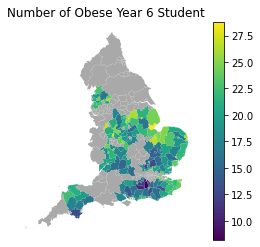

In [45]:
iid_90323_ltla.plot(column = "Value", missing_kwds = {"color":"darkgrey"},
                    legend = True)
plt.title("Number of Year 6 Obese Student")
plt.axis("off")

### Adult

In [15]:
iid = "2008"
iid_2008 = pd.read_csv(f"https://fingertips.phe.org.uk/api/all_data/csv/for_one_indicator?indicator_id={iid}")

In [16]:
iid_2008.head()

,Indicator ID,Indicator Name,Parent Code,Parent Name,Area Code,Area Name,Area Type,Sex,Age,Category Type,...,Count,Denominator,Value note,Recent Trend,Compared to England value or percentiles,Column not used,Time period Sortable,New data,Compared to goal,Time period range
0,2008,Spend: Obesity - adults,E92000001,England,E06000001,Hartlepool,UA,Not applicable,Not applicable,NaN,...,NaN,NaN,NaN,NaN,Not compared,Not compared,20130000,NaN,NaN,1y
1,2008,Spend: Obesity - adults,E92000001,England,E06000002,Middlesbrough,UA,Not applicable,Not applicable,NaN,...,NaN,NaN,NaN,NaN,Not compared,Not compared,20130000,NaN,NaN,1y
2,2008,Spend: Obesity - adults,E92000001,England,E06000003,Redcar and Cleveland,UA,Not applicable,Not applicable,NaN,...,NaN,NaN,NaN,NaN,Not compared,Not compared,20130000,NaN,NaN,1y
3,2008,Spend: Obesity - adults,E92000001,England,E06000004,Stockton-on-Tees,UA,Not applicable,Not applicable,NaN,...,NaN,NaN,NaN,NaN,Not compared,Not compared,20130000,NaN,NaN,1y
4,2008,Spend: Obesity - adults,E92000001,England,E06000005,Darlington,UA,Not applicable,Not applicable,NaN,...,NaN,NaN,NaN,NaN,Not compared,Not compared,20130000,NaN,NaN,1y


In [17]:
iid_2008["Time period Sortable"].value_counts()

Time period Sortable
20130000    155
20140000    155
20150000    155
20160000    155
20170000    155
20180000    155
20190000    153
20200000    153
Name: count, dtype: int64

In [18]:
iid_2008[(iid_2008['Area Type'] == "UA") & ]

SyntaxError: invalid syntax (<ipython-input-18-dea2e011a044>, line 1)

## ONS - Health Index
https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/healthandwellbeing/bulletins/healthinengland/2015to2020#health-in-england-data

With the adult obesity data, we have in total 290 data points for the 296 low-tier local authority aggregation.

In [19]:
# load the exccel file with the url
excel = pd.ExcelFile("https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/healthandsocialcare/healthandwellbeing/datasets/healthindexscoresengland/current/healthindexscoresengland.xlsx",
                     storage_options={'User-Agent': 'Mozilla/5.0'})
# parsing the ons dataframe
ons_health = pd.read_excel(excel, sheet_name= "Table_3_2021_Index", skiprows = 4, usecols= [0,1,2,3, 48,49,])
ons_health_ltla = ons_health[ons_health['Area Type [Note 3]'] == "LTLA"]
# check the left merge with no data
set(ltla_gdf['LAD23CD']).difference(set(ons_health_ltla["Area Code"]))

{'E06000053', 'E06000063', 'E06000064', 'E06000065', 'E06000066', 'E09000001'}

In [20]:
df = ltla_gdf.merge(ons_health_ltla,left_on = "LAD23CD", right_on = "Area Code", how = "left")

(-6.8277858715625985,
 2.1728242516266683,
 49.567347330988156,
 56.10840622399074)

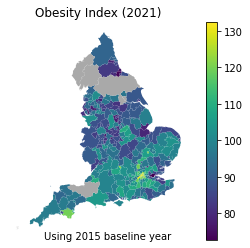

In [54]:

df.plot(column = "Overweight and obesity in adults [L3]",
        missing_kwds = {"color":"darkgrey"},
        legend = True)
plt.title("Obesity Index (2021)")
plt.annotate(text = "Using 2015 baseline year", xy = (-5, 49.6))
plt.axis("off")

In [139]:
df["Overweight and obesity in adults [L3]"].isna().sum()

6